In [1]:
using JLD2
using Revise
using ITensors
using LinearAlgebra
using Plots
using LsqFit

In [2]:

func1(t, p) = p[1] .+ p[2]./t.^2
func2(t, p) = p[1] .+ p[2]./t .+ p[3]./t.^2 
func3(t, p) = p[1] .+ p[2]./t .+ p[3]./t.^2 + p[4]./t.^3
func4(t, p) = p[1] .+ p[2]./t .+ p[3]./t.^2 + p[4]./t.^3 .+ p[5]./t.^4

funcexp(t, p) = p[1] .+ p[2].*exp.(-p[3].*t)


p0_1 = [1., 1.]
p0_2 = [1., 1., 0.1]
p0_3 = [1., 1., 1., 1.]
p0_4 = [1., 1., 1., 1., 1.]

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

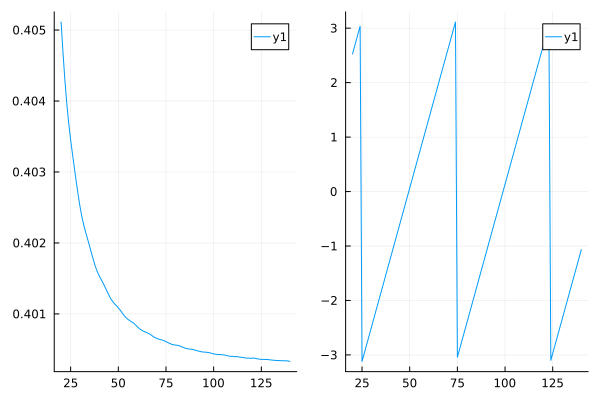

In [3]:
aa = jldopen("ising_beta2n.jld2")
ae = aa["allens"]  # T should go from 20 to 140

aa4 = jldopen("ising_beta4n.jld2")
ae4 = aa4["allens"]  # T should go from 20 to 140

aa6 = jldopen("ising_beta6n.jld2")
ae6 = aa6["allens"]  # T should go from 20 to 140


pl1 = plot(range(20,20+length(ae)-1), real(log.((ae))[1:end]))
pl2 = plot(range(20,20+length(ae)-1), imag(log.((ae))[1:end]))

plot(pl1,pl2)


In [4]:
aa4["allens"]

121-element Vector{Any}:
   -2.0450286541859555 + 1.4404031405070707im
   -2.2103543866840942 + 1.1683165128673512im
    -2.339813916658817 + 0.8776407357963429im
   -2.4313545125369656 + 0.573061380879152im
   -2.4835331914457988 + 0.2594866154619285im
    -2.495539916948665 - 0.058031853994984124im
    -2.467210365986466 - 0.3743801786359874im
    -2.399028480349309 - 0.6844648586333184im
   -2.2921186440779113 - 0.9832947699866103im
    -2.148227435638966 - 1.2660617469054545im
                       ⋮
   -1.2174713033983753 - 2.1662509070347666im
   -0.9331527783598541 - 2.30305459423806im
   -0.6338109014134607 - 2.402731700779278im
   -0.3242202102357295 - 2.4636636528640725im
 -0.009442047175337179 - 2.484886001528285im
   0.30550573366667516 - 2.4660487191665035im
    0.6155449280076734 - 2.4074396696680656im
    0.9156366647393519 - 2.310030328355993im
     1.200968917125136 - 2.175377936521833im

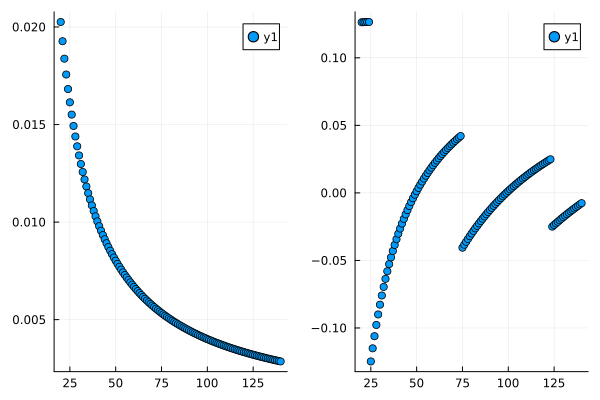

In [76]:
xs = range(20,20+length(ae)-1)

pl1 = scatter(xs, real(log.((ae))[1:end])./xs)
pl2 = scatter(xs, imag(log.((ae))[1:end])./xs)

plot(pl1,pl2)

In [77]:
testae = [1,2,3]
testxs = [10,20,30]

@show log.(testae)
@show log.(testae)./testxs

log.(testae) = [0.0, 0.6931471805599453, 1.0986122886681098]
log.(testae) ./ testxs = [0.0, 0.03465735902799726, 0.036620409622270325]


3-element Vector{Float64}:
 0.0
 0.03465735902799726
 0.036620409622270325

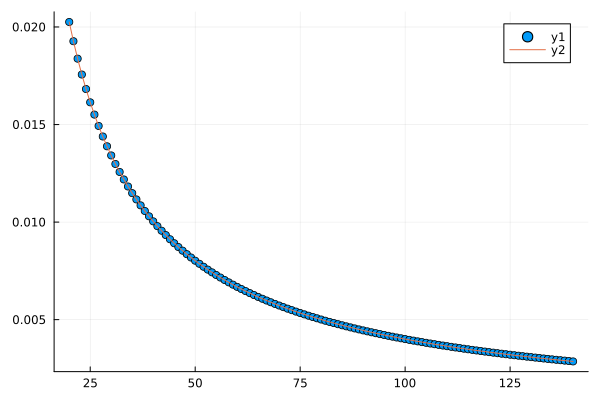

In [78]:
fit3 = curve_fit(func3, xs, real(log.((ae))[1:end])./xs, p0_3)
plot!(pl1, xs, func3(xs, fit3.param))



In [79]:
fit3.param

4-element Vector{Float64}:
 1.8263392734720335e-6
 0.39982104172747757
 0.027522946237942398
 1.547497069351026

fit2.param = [0.1270550710639171, -6.285019835005368, -0.27200389575406964]


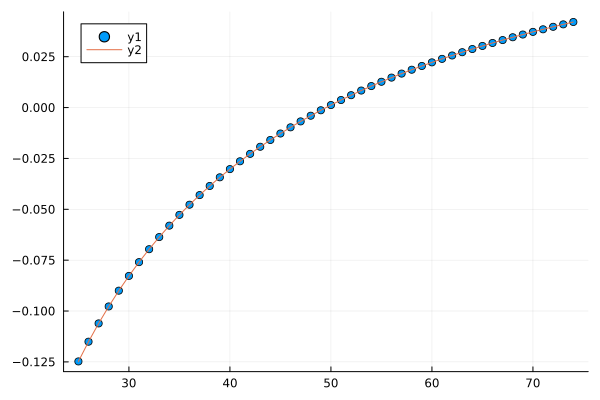

In [80]:
rrange = 6:55
pl2 = scatter(xs[rrange], imag(log.((ae))[rrange])./xs[rrange])
fit2 = curve_fit(func2, xs[rrange], imag(log.((ae))[rrange])./xs[rrange], p0_2)
@show fit2.param
plot(pl2, xs[rrange], func2(xs[rrange], fit2.param))

In [81]:
π*0.5/6 

0.2617993877991494

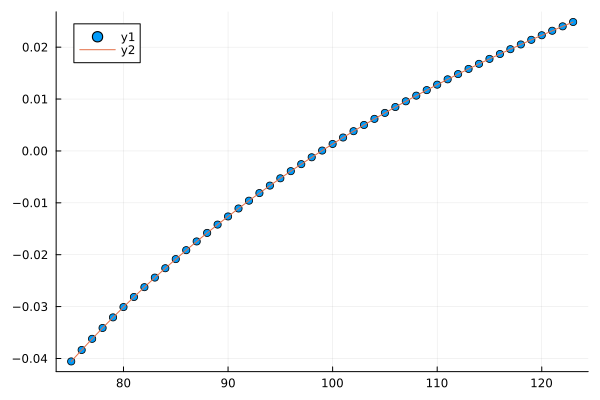

In [82]:
rrange = 56:104
pl2 = scatter(xs[rrange], imag(log.((ae))[rrange])./xs[rrange])
fit2 = curve_fit(func2, xs[rrange], imag(log.((ae))[rrange])./xs[rrange], p0_2)
plot(pl2, xs[rrange], func2(xs[rrange], fit2.param))

In [107]:
@show fit2.param

fit2.param = [0.12703954054913413, -12.566417620408524, -0.32371683778407195]


3-element Vector{Float64}:
   0.12703954054913413
 -12.566417620408524
  -0.32371683778407195

In [84]:
-12.566417620408524/4π


-1.0000037406225548

In [91]:
@show length(ae), length(ae4), length(ae6)

(length(ae), length(ae4), length(ae6)) = (121, 121, 121)


(121, 121, 121)

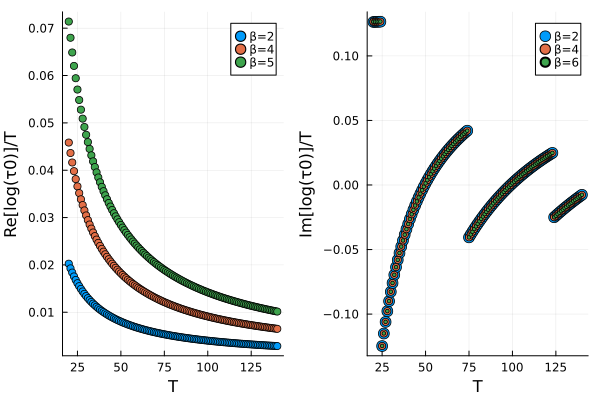

In [105]:

xs = range(20,20+length(ae)-1)

pl1 = scatter(xs, real(log.((ae))[1:end])./xs, label="β=2", xlabel="T", ylabel="Re[log(τ0)]/T")
scatter!(pl1, xs, real(log.((ae4))[1:end])./xs, label="β=4")
scatter!(pl1, xs, real(log.((ae6))[1:end])./xs, label="β=5")


pl2 = scatter(xs, imag(log.((ae))[1:end])./xs, markersize=6, label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")
scatter!(pl2, xs, imag(log.((ae4))[1:end])./xs, markersize=4, label="β=4")
scatter!(pl2, xs, imag(log.((ae6))[1:end])./xs, markersize=2, label="β=6")


plot(pl1,pl2)

fit3.param = [1.8263392734720335e-6, 0.39982104172747757, 0.027522946237942398, 1.547497069351026]
fit3_4.param = [6.526845021472206e-6, 0.9086338923870633, 0.09503587623680781, 1.34526310408782]
fit3_6.param = [1.1496955941349443e-5, 1.4176527614595342, 0.17883156045172216, 0.5098309076633486]


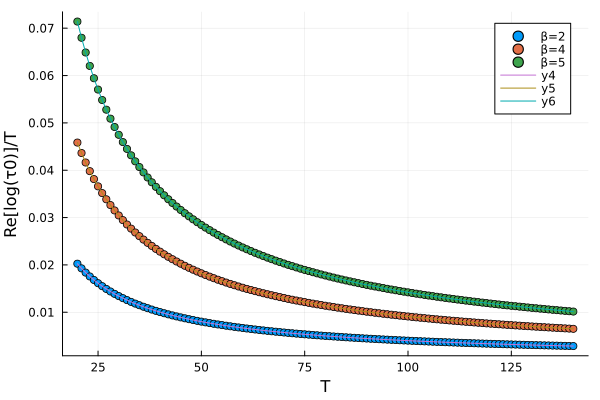

In [106]:
fit3 = curve_fit(func3, xs, real(log.((ae))[1:end])./xs, p0_3)
fit3_4 = curve_fit(func3, xs, real(log.((ae4))[1:end])./xs, p0_3)
fit3_6 = curve_fit(func3, xs, real(log.((ae6))[1:end])./xs, p0_3)


@show fit3.param
@show fit3_4.param
@show fit3_6.param

plot!(pl1, xs, func3(xs, fit3.param))
plot!(pl1, xs, func3(xs, fit3_4.param))
plot!(pl1, xs, func3(xs, fit3_6.param))


In [5]:
n1 = jldopen("cp_losc_ising.jld2")                            
n2 = jldopen("cp_losc_ising_2.jld2")                                                                      
n3 = jldopen("cp_losc_ising_3.jld2")                                                                               
n4 = jldopen("cp_losc_ising_4.jld2")

JLDFile /Users/uno/tensornetworks/fes_oe/julia_code/spectrum_tm/cp_losc_ising_4.jld2 (read-only)
 ├─🔢 allens
 ├─🔢 allens2
 └─🔢 norms

In [18]:
# ae = n1["allens"]
# xs = range(140,140+length(ae)-1)
# pl2 = scatter(xs, imag(log.((ae)))./xs, markersize=6, label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")

# ae2 = n2["allens"]
# xs = range(140+length(ae)-13,140+length(ae)-13+length(ae2)-1)
# scatter!(pl2, xs, imag(log.((ae2)))./xs, markersize=6, label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")

# ae3 = n3["allens"]
# xs = range(140+length(ae)-13+length(ae2),140+length(ae)-13+length(ae2)+length(ae3)-1)
# scatter!(pl2, xs, imag(log.((ae3)))./xs, markersize=6, label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")

# ae4 = n4["allens"]
# xs = range(140+length(ae)-13+length(ae2)+length(ae3),140+length(ae)-13+length(ae2)+length(ae3)+length(ae4)-1)
# scatter!(pl2, xs, imag(log.((ae4)))./xs, markersize=6, label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")


25-element Vector{Any}:
   -2.2201235151768612 + 1.1164462700455329im
    -2.343692552062032 + 0.8261055538309423im
    -2.429472460213385 + 0.5224569614288241im
    -2.476084958633518 + 0.21038328660003894im
   -2.4827867215865953 - 0.10506080792914438im
   -2.4494317171408593 - 0.4188492545460778im
    -2.376607802249563 - 0.7258518048798193im
   -2.2654648101312396 - 1.0211571042291987im
     -2.11779100119418 - 1.299996548975946im
   -1.9359817807265314 - 1.5578732550277676im
                       ⋮
 -0.009427796845690728 - 2.4848819965240687im
   0.30552321843705277 - 2.4660397536500764im
    0.6155274820970712 - 2.407454889885616im
    0.9156387340866536 - 2.310028905278526im
    1.2009701065924048 - 2.1753768851304454im
    1.4669341860053686 - 2.005660134328657im
     1.709244425521277 - 1.8036320378676225im
    1.9240095665212964 - 1.5724851245820912im
    2.1077531231268645 - 1.3159988837985248im

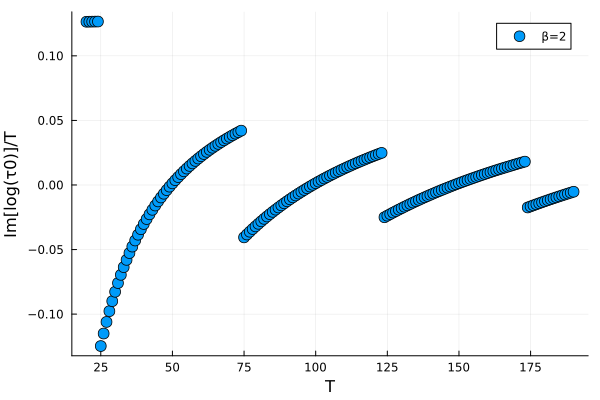

In [20]:
tog = deepcopy(ae4)
append!(tog,  n1["allens"][22:end-13])
append!(tog,  n2["allens"])
append!(tog,  n3["allens"])
append!(tog,  n4["allens"])

xs = range(20,20+length(tog)-1)
pl2 = scatter(xs, imag(log.((tog))./xs), markersize=6, label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")


In [11]:
func_cc(t, p) = p[1] .- p[2]*2π./t .- p[3]./t.^2  #.+ p[4]./t.^3


func_cc (generic function with 1 method)

In [56]:
rrange = 6:55
rrangeext = 4:57
p0_cc = [0.12, 1, -0.3]

pl2 = scatter(xs[rrange], imag(log.((tog))[rrange])./xs[rrange], label="β=4", xlabel="T", ylabel="Im[log(τ0)]/T")
fit2 = curve_fit(func_cc, xs[rrange], imag(log.((tog))[rrange])./xs[rrange], p0_cc)
@show fit2.param
plot!(pl2, xs[rrangeext], func_cc(xs[rrangeext], fit2.param), label="")
@show margin_error(fit2, 0.05)

rrange = 56:104
rrangeext= 54:106
p0_cc = [0.12, 2, -0.3]

scatter!(pl2,xs[rrange], imag(log.((tog))[rrange])./xs[rrange],label="")
fit2 = curve_fit(func_cc, xs[rrange], imag(log.((tog))[rrange])./xs[rrange], p0_cc)
@show fit2.param
plot!(pl2, xs[rrangeext], func_cc(xs[rrangeext], fit2.param),label="")
@show margin_error(fit2, 0.05)


p0_cc = [0.12, 3, -0.3]
rrange = 105:154
rrangeext = 103:156
scatter!(pl2,xs[rrange], imag(log.((tog))[rrange])./xs[rrange],label="")
fit2 = curve_fit(func_cc, xs[rrange], imag(log.((tog))[rrange])./xs[rrange], p0_cc)
@show fit2.param
plot!(pl2, xs[rrangeext], func_cc(xs[rrangeext], fit2.param),label="fit")
@show margin_error(fit2, 0.05)


fit2.param = [0.127071626885154, 1.0006172943413445, 0.203596408957904]
margin_error(fit2, 0.05) = [3.0915400709306354e-6, 4.205902169634134e-5, 0.005206072865976161]
fit2.param = [0.1270407574415318, 2.000053487654588, 0.30457776937155945]
margin_error(fit2, 0.05) = [2.7822907344940704e-7, 8.495518699289328e-6, 0.002517106500224838]
fit2.param = [0.12703921745738075, 2.9999882212422824, 0.3323255902585167]
margin_error(fit2, 0.05) = [8.378672149574129e-7, 3.904083252580636e-5, 0.01781646340946169]


3-element Vector{Float64}:
 8.378672149574129e-7
 3.904083252580636e-5
 0.01781646340946169

In [5]:
a = jldopen("cp_losc_ising_dt05_1.jld2")
b = jldopen("cp_losc_ising_dt05_2.jld2")

JLDFile /Users/uno/tensornetworks/fes_oe/julia_code/spectrum_tm/cp_losc_ising_dt05_2.jld2 (read-only)
 ├─🔢 allens
 ├─🔢 allens2
 └─🔢 norms

In [6]:
tog05 = deepcopy(a["allens"])
append!(tog05, b["allens"])

211-element Vector{Any}:
  1.2609294519893142 + 0.8834755707884431im
   1.199716992328146 + 0.9588155622725969im
  1.1338952331319259 + 1.0304535839403017im
  1.0637527729960303 + 1.0980737875500999im
   0.989588196828915 + 1.1613733570919724im
  0.9117086145380747 + 1.220065711049183im
   0.830428707175798 + 1.2738835614972281im
  0.7460702158884498 + 1.3225816676375082im
  0.6589617653660403 + 1.3659391610344396im
    0.56943889502135 + 1.4037613689982846im
                     ⋮
  0.9042552724778826 + 1.1859855349658757im
  0.8269937935619182 + 1.2410890701319532im
   0.746393316199996 + 1.2911668239760739im
  0.6627650412075669 + 1.3360163839811157im
  0.5764484817612006 + 1.375458657966463im
  0.4878014982437287 + 1.4093313129849323im
  0.3971878259479737 + 1.437501945238828im
   0.304954638161628 + 1.4598475650331169im
 0.21149168510235045 + 1.4762849832058258im

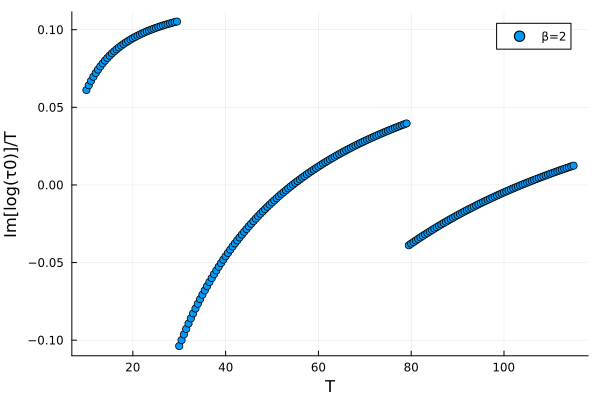

In [12]:
rrange = 1:length(tog05)
xs = 10:0.5:10+length(tog05)*0.5
pl2 = scatter(xs[rrange], imag(log.((tog05))[rrange])./xs[rrange], label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")

#pl2 = scatter(xs[rrange], imag(log.((tog05))[rrange]), label="β=2", xlabel="T", ylabel="Im[log(τ0)]/T")


fit2.param = [0.12724877729838366, 1.1011226421647553, 0.39044234877417017]
margin_error(fit2, 0.05) = [1.0908213425940705e-6, 1.6860787963910444e-5, 0.0024143008793862347]
fit3.param = [0.1274196714949596, -1.103828325986928]
margin_error(fit3, 0.05) = [8.822870195965747e-6, 6.818375136622043e-5]


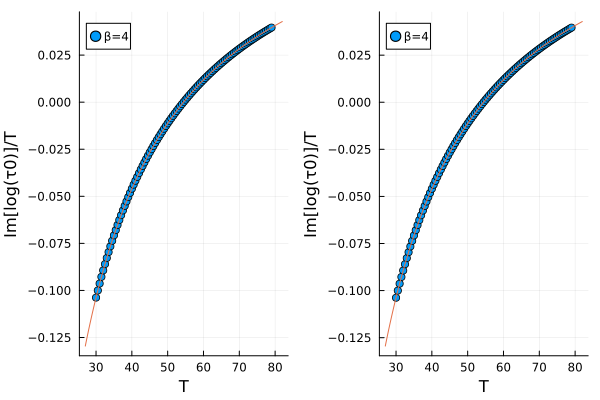

In [27]:
rrange = 41:139
rrangeext = 35:145
p0_cc = [0.12, 1, -0.3]

pl2 = scatter(xs[rrange], imag(log.((tog05))[rrange])./xs[rrange], label="β=4", xlabel="T", ylabel="Im[log(τ0)]/T")
fit2 = curve_fit(func_cc, xs[rrange], imag(log.((tog05))[rrange])./xs[rrange], p0_cc)
@show fit2.param
@show margin_error(fit2, 0.05)
plot!(pl2, xs[rrangeext], func_cc(xs[rrangeext], fit2.param), label="")


rrange = 41:139
rrangeext = 35:145
p0_cc1 = [0.12, 1]
func_cc1(t, p) = p[1] .+ 2π* p[2]./t

pl3 = scatter(xs[rrange], imag(log.((tog05))[rrange])./xs[rrange], label="β=4", xlabel="T", ylabel="Im[log(τ0)]/T")
fit3 = curve_fit(func_cc1, xs[rrange], imag(log.((tog05))[rrange])./xs[rrange], p0_cc1)
@show fit3.param
@show margin_error(fit3, 0.05)
plot!(pl3, xs[rrangeext], func_cc1(xs[rrangeext], fit3.param), label="")

plot(pl2,pl3)